In [2]:
#%tensorflow_version 1.x
import sys
sys.path.append("mrcnn")
from m_rcnn import *
import keras
print(keras.__version__)
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

VERS 0.2


Using TensorFlow backend.


2.3.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5284700088050727751
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4965466112
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14679399744773838047
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
!nvidia-smi

Sun Dec 19 18:53:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 496.76       Driver Version: 496.76       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   56C    P0    25W /  N/A |   1041MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Extract Images
#images_path = "dataset.zip"
#annotations_path = "annotations.json"

#extract_images(os.path.join(images_path), "dataset")

In [4]:
annotations_path = "annotations_final.json"
dataset_train = load_image_dataset(os.path.join(annotations_path), "dataset", "train")
dataset_val = load_image_dataset(os.path.join(annotations_path), "dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  annotations_final.json
[32, 295]
Annotation json path:  annotations_final.json
[0, 32]
Train: 263
Validation: 32
Classes: 1


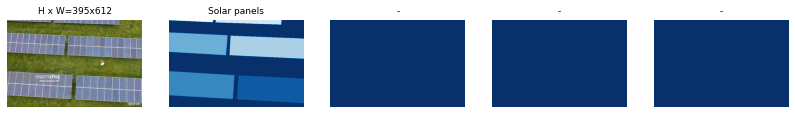

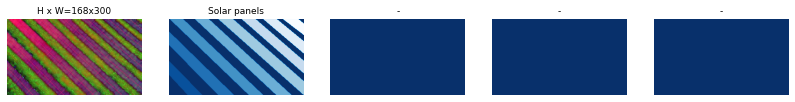

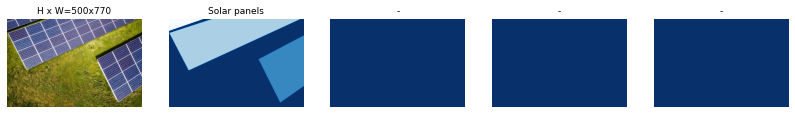

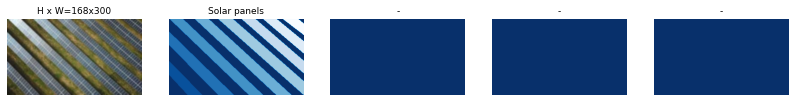

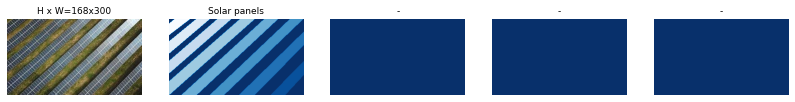

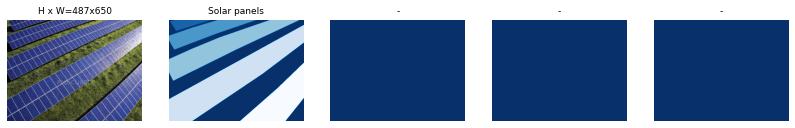

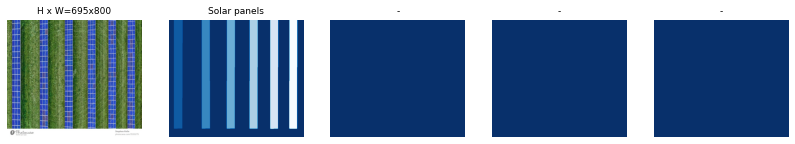

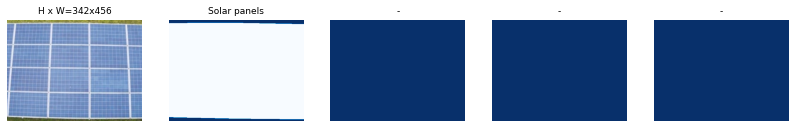

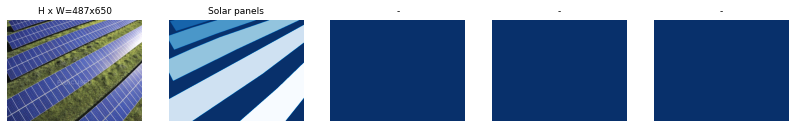

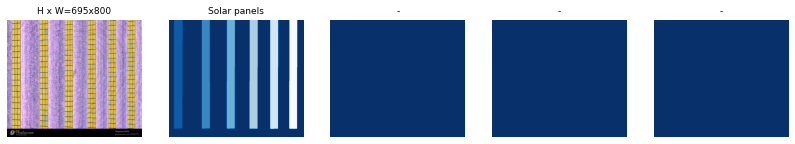

In [5]:
# Load image samples
display_image_samples(dataset_train)

In [6]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
C:\Users\titan\Mask_RCNN_1\mask_rcnn_coco.h5


In [7]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: C:\Users\titan\Mask_RCNN_1\logs\object20211219T1853\mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn

In [21]:
%reload_ext tensorboard

In [22]:
! powershell "echo 'checking for existing tensorboard processes'"
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}| %{kill $_}"

! powershell "echo 'cleaning tensorboard temp dir'"
! powershell "rm $env:TEMP\.tensorboard-info\*"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"


%tensorboard --logdir="logs\fit" --host localhost

checking for existing tensorboard processes

Handles  NPM(K)    PM(K)      WS(K)     CPU(s)     Id  SI ProcessName                                                  
-------  ------    -----      -----     ------     --  -- -----------                                                  
     66       5      720       3320       0.00  19584   1 tensorboard                                                  
     66       5      668       3292       0.00  20628   1 tensorboard                                                  


cleaning tensorboard temp dir


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 22612.

In [20]:
%tensorboard --logdir Mask_RCNN_1/logs/object20211219T1853

Launching TensorBoard...

KeyboardInterrupt: 

In [5]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  C:\Users\titan\Mask_RCNN_1\logs\object20211219T1853\mask_rcnn_object_0010.h5
Re-starting from epoch 10


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int32
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


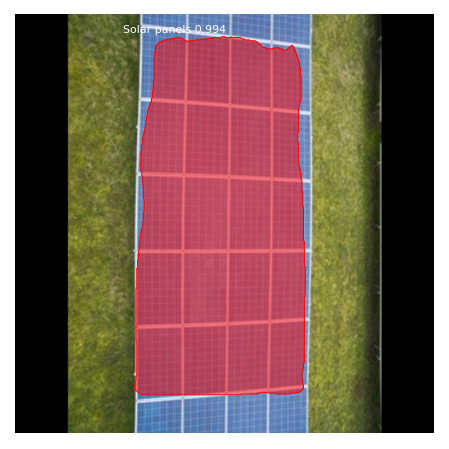

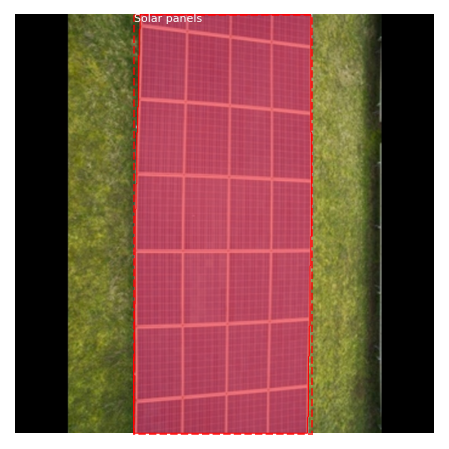

In [8]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)